In [1]:
import pandas as pd

In [2]:
%autosave 30

Autosaving every 30 seconds


In [3]:
import scipy
# Import the required Packages
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell
import sys
#import savReaderWriter as sav

In [4]:
import pandas as pd
df_kc=pd.read_csv("C:/Users/user/Desktop/ML/Kenya Customers.csv")
df_kc.head()

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location
0,3144837,WEB,0,2021-03-15T17:13:19.000Z,en,0,0,NaN,NaN
1,3174590,WEB,0,2021-03-20T14:15:11.000Z,en,0,0,NaN,NaN
2,3181998,WEB,0,2021-03-21T15:36:51.000Z,en,0,0,NaN,NaN
3,3191244,WEB,0,2021-03-23T08:54:00.000Z,en,0,367,NaN,NaN
4,3274222,WEB,0,2021-04-06T13:52:39.000Z,en,0,0,NaN,NaN


In [5]:
df_kc=df_kc[['Created At',
 'Customer ID',
 'Is Blocked',
 'Language',
 'Last Used Platform',
 'Loyalty Points',
 'Outstanding Amount']]

In [6]:
df_kc.head()

,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty Points,Outstanding Amount
0,2021-03-15T17:13:19.000Z,3144837,0,en,WEB,0,0
1,2021-03-20T14:15:11.000Z,3174590,0,en,WEB,0,0
2,2021-03-21T15:36:51.000Z,3181998,0,en,WEB,0,0
3,2021-03-23T08:54:00.000Z,3191244,0,en,WEB,367,0
4,2021-04-06T13:52:39.000Z,3274222,0,en,WEB,0,0


In [7]:
import pandas as pd
df_kd=pd.read_csv("C:/Users/user/Desktop/ML/Kenya Deliveries.csv")
df_kd.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"YR-11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN
2,368109621,"YR-11265175,0",3.681096e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:46:43 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.25,36.883330,NaN,-,Order_Details,10,KSh 19900.00,-,KSh 0.00,KSh 0.00,KSh 400.00,19500,CASH,-,-,-,NaN,NaN
3,368105817,"YR-11265015,0",3.681058e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:37:16 pm,18 Feb 2022 08:00:00 am,-,Unassigned,-,0,-,-1.28354,36.887286,NaN,-,Order_Details,1,KSh 4400.00,-,KSh 0.00,KSh 0.00,KSh 50.00,4350,CASH,-,-,-,NaN,NaN
4,368098308,"YR-11264651,0",3.680983e+29,Default Team,Delivery,Urgently deliver by 9.30am in the morning,-,-,-,-,Topup Mama,17 Feb 2022 04:19:53 pm,18 Feb 2022 09:00:00 am,-,Unassigned,-,0,-,-1.282722,36.743347,NaN,-,Order_Details,1,KSh 180.00,-,-,-,-,-,-,-,-,-,NaN,NaN


In [8]:
df_kd=df_kd[['Agent_ID',
 'Complete_Before',
 'Completion_Time',
 'Custom_Template_ID',
 'Delivery_Charges',
 'Discount',
 'Distance(m)',
 'Earning',
 'Latitude',
 'Longitude',
 'Notes',
 'Order_ID',
 'Payment_Type',
 'Pick_up_From',
 'Pricing',
 'Promo_Applied',
 'Rating',
 'Ref_Images',
 'Relationship',
 'Review',
 'Special_Instructions',
 'Start_Before',
 'Subtotal',
 'Tags',
 'Task_Category',
 'Task_Details_AMOUNT',
 'Task_Details_QTY',
 'Task_ID',
 'Task_Status',
 'Task_Type',
 'Team_Name',
 'Tip',
 'Total_Time_Taken(min)']]

In [9]:
df_kd1=df_kd.replace("YR-","")
df_kd1


,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,-,18 Feb 2022 11:00:00 am,-,Order_Details,-,-,-,-,-1.2664883,36.834632,NaN,"YR-11265216,0",-,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,-,NaN,-,KSh 4400.00,1,368110390,Unassigned,Delivery,Default Team,-,-
1,-,18 Feb 2022 11:00:00 am,-,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2664883,36.834632,NaN,"YR-11265216,0",CASH,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,4700,NaN,-,KSh 300.00,12,368110390,Unassigned,Delivery,Default Team,KSh 0.00,-
2,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 400.00,-,-,-1.25,36.883330,NaN,"YR-11265175,0",CASH,Topup Mama,-,-,0,-,3.681096e+29,-,-,17 Feb 2022 04:46:43 pm,19500,NaN,-,KSh 19900.00,10,368109621,Unassigned,Delivery,Default Team,KSh 0.00,-
3,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 50.00,-,-,-1.28354,36.887286,NaN,"YR-11265015,0",CASH,Topup Mama,-,-,0,-,3.681058e+29,-,-,17 Feb 2022 04:37:16 pm,4350,NaN,-,KSh 4400.00,1,368105817,Unassigned,Delivery,Default Team,KSh 0.00,-
4,-,18 Feb 2022 09:00:00 am,-,Order_Details,-,-,-,-,-1.282722,36.743347,Urgently deliver by 9.30am in the morning,"YR-11264651,0",-,Topup Mama,-,-,0,-,3.680983e+29,-,-,17 Feb 2022 04:19:53 pm,-,NaN,-,KSh 180.00,1,368098308,Unassigned,Delivery,Default Team,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44978,-,24 Mar 2021 08:00:00 am,-,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2568234,36.792722,NaN,"YR-5319666,0",CASH,kibandatopup,-,-,0,-,2.192714e+29,-,-,23 Mar 2021 01:00:00 pm,6240,NaN,-,KSh 1800.00,1,219271375,Unassigned,Delivery,Default Team,KSh 0.00,-
44979,-,22 Mar 2021 12:00:00 pm,25 Mar 2021 04:59:14 pm,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2931526,36.790854,NaN,"YR-5304830,0",Pay Later,kibandatopup,-,-,0,-,2.186584e+29,-,-,22 Mar 2021 11:34:31 am,3990,NaN,-,KSh 3990.00,10,218658360,Cancelled,Delivery,Default Team,KSh 0.00,0
44980,-,24 Mar 2021 01:18:00 am,25 Mar 2021 04:59:19 pm,Order_Details,-,-,-,-,-1.2931526,36.790854,NaN,"YR-5304690,0",-,kibandatopup,-,-,0,-,2.186499e+29,-,-,23 Mar 2021 06:18:17 am,-,NaN,-,KSh 1800.00,1,218649867,Cancelled,Delivery,Default Team,-,0
44981,-,24 Mar 2021 01:18:00 am,25 Mar 2021 04:59:19 pm,Order_Details,-,-,-,-,-1.2931526,36.790854,NaN,"YR-5304690,0",-,kibandatopup,-,-,0,-,2.186499e+29,-,-,23 Mar 2021 06:18:17 am,-,NaN,-,KSh 1250.00,1,218649867,Cancelled,Delivery,Default Team,-,0


In [10]:
# removing unnecssarry characters
df_kde= df_kd.replace(r'YR-', '',regex=True)
df_kde.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,-,18 Feb 2022 11:00:00 am,-,Order_Details,-,-,-,-,-1.2664883,36.834632,NaN,"11265216,0",-,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,-,NaN,-,KSh 4400.00,1,368110390,Unassigned,Delivery,Default Team,-,-
1,-,18 Feb 2022 11:00:00 am,-,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2664883,36.834632,NaN,"11265216,0",CASH,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,4700,NaN,-,KSh 300.00,12,368110390,Unassigned,Delivery,Default Team,KSh 0.00,-
2,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 400.00,-,-,-1.25,36.883330,NaN,"11265175,0",CASH,Topup Mama,-,-,0,-,3.681096e+29,-,-,17 Feb 2022 04:46:43 pm,19500,NaN,-,KSh 19900.00,10,368109621,Unassigned,Delivery,Default Team,KSh 0.00,-
3,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 50.00,-,-,-1.28354,36.887286,NaN,"11265015,0",CASH,Topup Mama,-,-,0,-,3.681058e+29,-,-,17 Feb 2022 04:37:16 pm,4350,NaN,-,KSh 4400.00,1,368105817,Unassigned,Delivery,Default Team,KSh 0.00,-
4,-,18 Feb 2022 09:00:00 am,-,Order_Details,-,-,-,-,-1.282722,36.743347,Urgently deliver by 9.30am in the morning,"11264651,0",-,Topup Mama,-,-,0,-,3.680983e+29,-,-,17 Feb 2022 04:19:53 pm,-,NaN,-,KSh 180.00,1,368098308,Unassigned,Delivery,Default Team,-,-


In [11]:
df_kde['Order_ID']= df_kde['Order_ID'].replace(r'[,]', '',regex=True)
df_kde.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,-,18 Feb 2022 11:00:00 am,-,Order_Details,-,-,-,-,-1.2664883,36.834632,NaN,112652160,-,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,-,NaN,-,KSh 4400.00,1,368110390,Unassigned,Delivery,Default Team,-,-
1,-,18 Feb 2022 11:00:00 am,-,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2664883,36.834632,NaN,112652160,CASH,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,4700,NaN,-,KSh 300.00,12,368110390,Unassigned,Delivery,Default Team,KSh 0.00,-
2,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 400.00,-,-,-1.25,36.883330,NaN,112651750,CASH,Topup Mama,-,-,0,-,3.681096e+29,-,-,17 Feb 2022 04:46:43 pm,19500,NaN,-,KSh 19900.00,10,368109621,Unassigned,Delivery,Default Team,KSh 0.00,-
3,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 50.00,-,-,-1.28354,36.887286,NaN,112650150,CASH,Topup Mama,-,-,0,-,3.681058e+29,-,-,17 Feb 2022 04:37:16 pm,4350,NaN,-,KSh 4400.00,1,368105817,Unassigned,Delivery,Default Team,KSh 0.00,-
4,-,18 Feb 2022 09:00:00 am,-,Order_Details,-,-,-,-,-1.282722,36.743347,Urgently deliver by 9.30am in the morning,112646510,-,Topup Mama,-,-,0,-,3.680983e+29,-,-,17 Feb 2022 04:19:53 pm,-,NaN,-,KSh 180.00,1,368098308,Unassigned,Delivery,Default Team,-,-


In [12]:
df_kde['Order_ID']= df_kde['Order_ID'].replace(r'[0]', '',regex=True)
df_kde.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,-,18 Feb 2022 11:00:00 am,-,Order_Details,-,-,-,-,-1.2664883,36.834632,NaN,11265216,-,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,-,NaN,-,KSh 4400.00,1,368110390,Unassigned,Delivery,Default Team,-,-
1,-,18 Feb 2022 11:00:00 am,-,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2664883,36.834632,NaN,11265216,CASH,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,4700,NaN,-,KSh 300.00,12,368110390,Unassigned,Delivery,Default Team,KSh 0.00,-
2,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 400.00,-,-,-1.25,36.883330,NaN,11265175,CASH,Topup Mama,-,-,0,-,3.681096e+29,-,-,17 Feb 2022 04:46:43 pm,19500,NaN,-,KSh 19900.00,10,368109621,Unassigned,Delivery,Default Team,KSh 0.00,-
3,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 50.00,-,-,-1.28354,36.887286,NaN,1126515,CASH,Topup Mama,-,-,0,-,3.681058e+29,-,-,17 Feb 2022 04:37:16 pm,4350,NaN,-,KSh 4400.00,1,368105817,Unassigned,Delivery,Default Team,KSh 0.00,-
4,-,18 Feb 2022 09:00:00 am,-,Order_Details,-,-,-,-,-1.282722,36.743347,Urgently deliver by 9.30am in the morning,11264651,-,Topup Mama,-,-,0,-,3.680983e+29,-,-,17 Feb 2022 04:19:53 pm,-,NaN,-,KSh 180.00,1,368098308,Unassigned,Delivery,Default Team,-,-


In [13]:
df_kded = df_kde.rename(columns = {'Order_ID': 'Order ID'}, inplace = False)

In [14]:
df_kded.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,-,18 Feb 2022 11:00:00 am,-,Order_Details,-,-,-,-,-1.2664883,36.834632,NaN,11265216,-,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,-,NaN,-,KSh 4400.00,1,368110390,Unassigned,Delivery,Default Team,-,-
1,-,18 Feb 2022 11:00:00 am,-,Order_Details,KSh 0.00,KSh 0.00,-,-,-1.2664883,36.834632,NaN,11265216,CASH,Topup Mama,-,-,0,-,3.681104e+29,-,-,17 Feb 2022 04:48:44 pm,4700,NaN,-,KSh 300.00,12,368110390,Unassigned,Delivery,Default Team,KSh 0.00,-
2,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 400.00,-,-,-1.25,36.883330,NaN,11265175,CASH,Topup Mama,-,-,0,-,3.681096e+29,-,-,17 Feb 2022 04:46:43 pm,19500,NaN,-,KSh 19900.00,10,368109621,Unassigned,Delivery,Default Team,KSh 0.00,-
3,-,18 Feb 2022 08:00:00 am,-,Order_Details,KSh 0.00,KSh 50.00,-,-,-1.28354,36.887286,NaN,1126515,CASH,Topup Mama,-,-,0,-,3.681058e+29,-,-,17 Feb 2022 04:37:16 pm,4350,NaN,-,KSh 4400.00,1,368105817,Unassigned,Delivery,Default Team,KSh 0.00,-
4,-,18 Feb 2022 09:00:00 am,-,Order_Details,-,-,-,-,-1.282722,36.743347,Urgently deliver by 9.30am in the morning,11264651,-,Topup Mama,-,-,0,-,3.680983e+29,-,-,17 Feb 2022 04:19:53 pm,-,NaN,-,KSh 180.00,1,368098308,Unassigned,Delivery,Default Team,-,-


In [28]:
import pandas as pd
df_ko=pd.read_csv("C:/Users/user/Desktop/ML/Kenya Orders.csv")
df_ko.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250,4250,4400,4350.0,4400,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,3755460,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,10.90,2022-02-17T16:36:27.000Z,2022-02-17T16:37:16.000Z,2022-02-18T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,50,-,NaN,0,-,-
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130,130,180,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247,1482,1578,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58,580,650,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,249,7255.0,7255,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,4541187,893555,Topup Mama,"Kilimani, Nairobi, Kenya",Urgently deliver by 9.30am in the morning,6.99,2022-02-17T16:19:05.000Z,2022-02-17T16:19:53.000Z,2022-02-18T09:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,-,NaN,0,-,-


In [29]:
df_ko=df_ko[['Additional Charge',
 'Cancellation Reason',
 'Category Name',
 'Checkout Template Name',
 'Checkout Template Value',
 'Commission Amount',
 'Commission Payout Status',
 'Consumed Loyalty Points',
 'Cost Price',
 'Currency Symbol',
 'Customer ID',
 'Customization Group',
 'Customization Option',
 'Delivery Charge',
 'Delivery Time',
 'Description',
 'Discount',
 'Distance (in km)',
 'Flat Discount',
 'Merchant Earning',
 'Merchant ID',
 'Order ID',
 'Order Preparation Time',
 'Order Status',
 'Order Time',
 'Order Total',
 'Payment Method',
 'Pickup Address',
 'Pickup Time',
 'Promo Code',
 'Quantity',
 'Ratings',
 'Redeemed Loyalty Points',
 'Remaining Balance',
 'Reviews',
 'SKU',
 'Store Name',
 'Sub Total',
 'Tax',
 'Taxable Amount',
 'Tip',
 'Total Cost Price',
 'Total Price',
 'Transaction ID',
 'Transaction Status',
 'Unit Price']]

In [30]:
set(df_kc.columns).intersection(set(df_nc.columns))

NameError: name 'df_nc' is not defined

In [31]:
set(df_kd.columns).intersection(set(df_nd.columns))

NameError: name 'df_nd' is not defined

In [32]:
set(df_ko.columns).intersection(set(df_no.columns))

NameError: name 'df_no' is not defined

In [33]:
left_merge = pd.merge(left=df_kc, right=df_ko, on='Customer ID', how="inner")
left_merge.head(5)

,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty Points,Outstanding Amount,Additional Charge,Cancellation Reason,Category Name,Checkout Template Name,Checkout Template Value,Commission Amount,Commission Payout Status,Consumed Loyalty Points,Cost Price,Currency Symbol,Customization Group,Customization Option,Delivery Charge,Delivery Time,Description,Discount,Distance (in km),Flat Discount,Merchant Earning,Merchant ID,Order ID,Order Preparation Time,Order Status,Order Time,Order Total,Payment Method,Pickup Address,Pickup Time,Promo Code,Quantity,Ratings,Redeemed Loyalty Points,Remaining Balance,Reviews,SKU,Store Name,Sub Total,Tax,Taxable Amount,Tip,Total Cost Price,Total Price,Transaction ID,Transaction Status,Unit Price
0,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,65,4270,KSh,NaN,NaN,-,2022-02-12T08:00:00.000Z,NaN,-,20.09,0,NaN,893555,11155410,0,COMPLETED,2022-02-11T20:02:56.000Z,6470.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-11T20:00:32.000Z,NaN,1,NaN,46,0,NaN,KKCO0620,Topup Mama,6516,-,-,-,4270,4320,0,NaN,4320
1,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,65,1630,KSh,NaN,NaN,-,2022-02-12T08:00:00.000Z,NaN,-,20.09,0,NaN,893555,11155410,0,COMPLETED,2022-02-11T20:02:56.000Z,6470.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-11T20:00:32.000Z,NaN,1,NaN,46,0,NaN,KKFS0222,Topup Mama,6516,-,-,-,1630,1670,0,NaN,1670
2,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,65,247,KSh,NaN,NaN,-,2022-02-12T08:00:00.000Z,NaN,-,20.09,0,NaN,893555,11155410,0,COMPLETED,2022-02-11T20:02:56.000Z,6470.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-11T20:00:32.000Z,NaN,2,NaN,46,0,NaN,KKFS0702,Topup Mama,6516,-,-,-,494,526,0,NaN,263
3,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,43,4270,KSh,NaN,NaN,-,2022-02-11T08:00:00.000Z,NaN,-,20.09,0,NaN,893555,11138864,0,COMPLETED,2022-02-10T22:20:24.000Z,4280.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-10T22:21:11.000Z,NaN,1,NaN,40,0,NaN,KKCO0620,Topup Mama,4320,-,-,-,4270,4320,0,NaN,4320
4,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,54,4250,KSh,NaN,NaN,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,NaN,893555,11253217,0,COMPLETED,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,NaN,1,NaN,70,0,NaN,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,NaN,4400


In [34]:
left_merge['Order ID']=left_merge['Order ID'].astype(str)


In [35]:
# left_merge.dtypes

In [36]:
left_merged = pd.merge(left=left_merge, right=df_kded, on="Order ID", how="inner")
left_merged.head(5)

,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty Points,Outstanding Amount,Additional Charge,Cancellation Reason,Category Name,Checkout Template Name,Checkout Template Value,Commission Amount,Commission Payout Status,Consumed Loyalty Points,Cost Price,Currency Symbol,Customization Group,Customization Option,Delivery Charge,Delivery Time,Description,Discount_x,Distance (in km),Flat Discount,Merchant Earning,Merchant ID,Order ID,Order Preparation Time,Order Status,Order Time,Order Total,Payment Method,Pickup Address,Pickup Time,Promo Code,Quantity,Ratings,Redeemed Loyalty Points,Remaining Balance,Reviews,SKU,Store Name,Sub Total,Tax,Taxable Amount,Tip_x,Total Cost Price,Total Price,Transaction ID,Transaction Status,Unit Price,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount_y,Distance(m),Earning,Latitude,Longitude,Notes,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip_y,Total_Time_Taken(min)
0,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,43,4270,KSh,NaN,NaN,-,2022-02-11T08:00:00.000Z,NaN,-,20.09,0,NaN,893555,11138864,0,COMPLETED,2022-02-10T22:20:24.000Z,4280.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-10T22:21:11.000Z,NaN,1,NaN,40,0,NaN,KKCO0620,Topup Mama,4320,-,-,-,4270,4320,0,NaN,4320,1092535,11 Feb 2022 10:00:00 am,11 Feb 2022 08:12:25 am,Order_Details,KSh 0.00,KSh 40.00,1557,0,-1.1496162,36.947408,NaN,CASH,Topup Mama,0,-,0,-,3.653445e+29,-,-,10 Feb 2022 10:21:11 pm,4280,NaN,-,KSh 4320.00,1,365344477,Completed,Delivery,Default Team,KSh 0.00,9.87
1,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,54,4250,KSh,NaN,NaN,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,NaN,893555,11253217,0,COMPLETED,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,NaN,1,NaN,70,0,NaN,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,NaN,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,-,-,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,-,Topup Mama,0,-,0,-,3.677591e+29,-,-,16 Feb 2022 08:47:52 pm,-,NaN,-,KSh 4400.00,1,367759097,Completed,Delivery,Default Team,-,6.55
2,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,54,4250,KSh,NaN,NaN,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,NaN,893555,11253217,0,COMPLETED,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,NaN,1,NaN,70,0,NaN,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,NaN,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,-,-,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,-,Topup Mama,0,-,0,-,3.677591e+29,-,-,16 Feb 2022 08:47:52 pm,-,NaN,-,KSh 1020.00,3,367759097,Completed,Delivery,Default Team,-,6.55
3,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,54,4250,KSh,NaN,NaN,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,NaN,893555,11253217,0,COMPLETED,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,NaN,1,NaN,70,0,NaN,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,NaN,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,KSh 0.00,KSh 70.00,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,CASH,Topup Mama,0,-,0,-,3.677591e+29,-,Deliver tomorrow morning by 6.00a.m,16 Feb 2022 08:47:52 pm,5415,NaN,-,KSh 65.00,1,367759097,Completed,Delivery,Default Team,KSh 0.00,6.55
4,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,NaN,Meat & Fish,-,-,NaN,NaN,54,320,KSh,NaN,NaN,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,NaN,893555,11253217,0,COMPLETED,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52

In [37]:
left_merged.shape

(9059, 84)

NIGERIA DATA

In [38]:
df_nc=pd.read_csv("C:/Users/user/Desktop/ML/Nigeria Customers.csv")
df_nc

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees
0,3922702,WEB,0,2021-07-12T08:06:47.000Z,en,0,0,NaN
1,4058001,WEB,0,2021-08-05T08:22:35.000Z,en,0,0,NaN
2,4058334,WEB,0,2021-08-05T09:38:09.000Z,en,0,0,NaN
3,4058414,WEB,0,2021-08-05T09:56:57.000Z,en,0,0,NaN
4,4058431,WEB,0,2021-08-05T09:59:51.000Z,en,0,0,NaN
...,...,...,...,...,...,...,...,...
1090,5161258,WEB,0,2022-02-11T07:11:38.000Z,en,0,0,4.0
1091,5166213,WEB,0,2022-02-12T08:45:47.000Z,en,0,0,5.0
1092,5176040,WEB,0,2022-02-14T11:23:01.000Z,en,0,42,2.0
1093,5184379,WEB,0,2022-02-16T09:59:58.000Z,en,0,0,2.0


In [39]:
df_nc=df_nc[['Created At',
 'Customer ID',
 'Is Blocked',
 'Language',
 'Last Used Platform',
 'Loyalty Points',
 'Outstanding Amount']]

In [44]:
df_nd=pd.read_csv("C:/Users/user/Desktop/ML/Nigeria Deliveries.csv")
df_nd.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
2,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.555800,3.392317,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
3,368012178,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.555800,3.392317,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-
4,367999205,"YR-11261341,0",3.679992e+29,Default Team,Delivery,NaN,1233220,-,-,Topup Mama,17 Feb 2022 10:33:11 am,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.481961,3.347986,NaN,-,Order_Details,6,₦ 1950.00,-,-,-,-,-,-,-,-,-


In [45]:
df_nd=df_nd[['Agent_ID',
 'Complete_Before',
 'Completion_Time',
 'Custom_Template_ID',
 'Delivery_Charges',
 'Discount',
 'Distance(m)',
 'Earning',
 'Latitude',
 'Longitude',
 'Notes',
 'Order_ID',
 'Payment_Type',
 'Pick_up_From',
 'Pricing',
 'Promo_Applied',
 'Rating',
 'Ref_Images',
 'Relationship',
 'Review',
 'Special_Instructions',
 'Start_Before',
 'Subtotal',
 'Tags',
 'Task_Category',
 'Task_Details_AMOUNT',
 'Task_Details_QTY',
 'Task_ID',
 'Task_Status',
 'Task_Type',
 'Team_Name',
 'Tip',
 'Total_Time_Taken(min)']]

In [46]:
df_nde= df_nd.replace(r'YR-', '',regex=True)
df_nde.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.544412,3.401738,NaN,"11262518,0",-,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,-,NaN,-,₦ 104250.00,5,368032956,Assigned,Delivery,Default Team,-,-
1,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,-,-,6.544412,3.401738,NaN,"11262518,0",CASH,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,104575,NaN,-,₦ 325.00,1,368032956,Assigned,Delivery,Default Team,₦ 0.00,-
2,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,-,-,11,-,6.555800,3.392317,NaN,"11261796,0",-,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,-,NaN,-,₦ 104250.00,5,368012178,In Transit,Delivery,Default Team,-,-
3,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,11,-,6.555800,3.392317,NaN,"11261796,0",CASH,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,104575,NaN,-,₦ 325.00,1,368012178,In Transit,Delivery,Default Team,₦ 0.00,-
4,1233220,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.481961,3.347986,NaN,"11261341,0",-,Topup Mama,-,-,0,-,3.679992e+29,-,-,17 Feb 2022 10:33:11 am,-,NaN,-,₦ 1950.00,6,367999205,Assigned,Delivery,Default Team,-,-


In [47]:
df_nde['Order_ID']= df_nde['Order_ID'].replace(r'[,]', '',regex=True)
df_nde.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.544412,3.401738,NaN,112625180,-,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,-,NaN,-,₦ 104250.00,5,368032956,Assigned,Delivery,Default Team,-,-
1,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,-,-,6.544412,3.401738,NaN,112625180,CASH,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,104575,NaN,-,₦ 325.00,1,368032956,Assigned,Delivery,Default Team,₦ 0.00,-
2,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,-,-,11,-,6.555800,3.392317,NaN,112617960,-,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,-,NaN,-,₦ 104250.00,5,368012178,In Transit,Delivery,Default Team,-,-
3,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,11,-,6.555800,3.392317,NaN,112617960,CASH,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,104575,NaN,-,₦ 325.00,1,368012178,In Transit,Delivery,Default Team,₦ 0.00,-
4,1233220,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.481961,3.347986,NaN,112613410,-,Topup Mama,-,-,0,-,3.679992e+29,-,-,17 Feb 2022 10:33:11 am,-,NaN,-,₦ 1950.00,6,367999205,Assigned,Delivery,Default Team,-,-


In [48]:
df_nde['Order_ID']= df_nde['Order_ID'].replace(r'[0]', '',regex=True)
df_nde.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order_ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.544412,3.401738,NaN,11262518,-,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,-,NaN,-,₦ 104250.00,5,368032956,Assigned,Delivery,Default Team,-,-
1,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,-,-,6.544412,3.401738,NaN,11262518,CASH,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,104575,NaN,-,₦ 325.00,1,368032956,Assigned,Delivery,Default Team,₦ 0.00,-
2,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,-,-,11,-,6.555800,3.392317,NaN,11261796,-,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,-,NaN,-,₦ 104250.00,5,368012178,In Transit,Delivery,Default Team,-,-
3,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,11,-,6.555800,3.392317,NaN,11261796,CASH,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,104575,NaN,-,₦ 325.00,1,368012178,In Transit,Delivery,Default Team,₦ 0.00,-
4,1233220,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.481961,3.347986,NaN,11261341,-,Topup Mama,-,-,0,-,3.679992e+29,-,-,17 Feb 2022 10:33:11 am,-,NaN,-,₦ 1950.00,6,367999205,Assigned,Delivery,Default Team,-,-


In [49]:
df_nded = df_nde.rename(columns = {'Order_ID': 'Order ID'}, inplace = False)
df_nded.head()

,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount,Distance(m),Earning,Latitude,Longitude,Notes,Order ID,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip,Total_Time_Taken(min)
0,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.544412,3.401738,NaN,11262518,-,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,-,NaN,-,₦ 104250.00,5,368032956,Assigned,Delivery,Default Team,-,-
1,1150142,17 Feb 2022 02:30:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,-,-,6.544412,3.401738,NaN,11262518,CASH,Topup Mama,-,-,0,-,3.680330e+29,-,-,17 Feb 2022 12:04:02 pm,104575,NaN,-,₦ 325.00,1,368032956,Assigned,Delivery,Default Team,₦ 0.00,-
2,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,-,-,11,-,6.555800,3.392317,NaN,11261796,-,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,-,NaN,-,₦ 104250.00,5,368012178,In Transit,Delivery,Default Team,-,-
3,1166840,17 Feb 2022 02:00:00 pm,-,Order_Details,₦ 0.00,₦ 0.00,11,-,6.555800,3.392317,NaN,11261796,CASH,Topup Mama,-,-,0,-,3.680122e+29,-,-,17 Feb 2022 11:10:30 am,104575,NaN,-,₦ 325.00,1,368012178,In Transit,Delivery,Default Team,₦ 0.00,-
4,1233220,17 Feb 2022 02:30:00 pm,-,Order_Details,-,-,-,-,6.481961,3.347986,NaN,11261341,-,Topup Mama,-,-,0,-,3.679992e+29,-,-,17 Feb 2022 10:33:11 am,-,NaN,-,₦ 1950.00,6,367999205,Assigned,Delivery,Default Team,-,-


In [50]:
df_no=pd.read_csv("C:/Users/user/Desktop/ML/Nigeria Orders.csv")
df_no.head()

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,11262518,ORDERED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4645484,1048159,Topup Mama,-,NaN,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
1,11262518,ORDERED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4645484,1048159,Topup Mama,-,NaN,11996.01,2022-02-17T12:03:13.000Z,2022-02-17T12:04:02.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
2,11261796,DISPATCHED,Flour & Sugar,KNFS0001,NaN,NaN,5,20850,20370,101850,104250,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4420776,1048159,Topup Mama,-,NaN,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
3,11261796,DISPATCHED,Spreads,KNSP2001,NaN,NaN,1,325,300,300,325,104575.0,104575,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,4420776,1048159,Topup Mama,-,NaN,11994.38,2022-02-17T11:09:43.000Z,2022-02-17T11:10:30.000Z,2022-02-17T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-
4,11261341,ORDERED,Spreads,KNSP2001,NaN,NaN,6,325,300,1800,1950,87550.0,87550,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,5156201,1048159,Topup Mama,-,NaN,11998.28,2022-02-17T10:32:23.000Z,2022-02-17T10:33:11.000Z,2022-02-17T11:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,-,NaN,0,-,-


In [51]:
df_no=df_no[['Additional Charge',
 'Cancellation Reason',
 'Category Name',
 'Checkout Template Name',
 'Checkout Template Value',
 'Commission Amount',
 'Commission Payout Status',
 'Consumed Loyalty Points',
 'Cost Price',
 'Currency Symbol',
 'Customer ID',
 'Customization Group',
 'Customization Option',
 'Delivery Charge',
 'Delivery Time',
 'Description',
 'Discount',
 'Distance (in km)',
 'Flat Discount',
 'Merchant Earning',
 'Merchant ID',
 'Order ID',
 'Order Preparation Time',
 'Order Status',
 'Order Time',
 'Order Total',
 'Payment Method',
 'Pickup Address',
 'Pickup Time',
 'Promo Code',
 'Quantity',
 'Ratings',
 'Redeemed Loyalty Points',
 'Remaining Balance',
 'Reviews',
 'SKU',
 'Store Name',
 'Sub Total',
 'Tax',
 'Taxable Amount',
 'Tip',
 'Total Cost Price',
 'Total Price',
 'Transaction ID',
 'Transaction Status',
 'Unit Price']]

In [52]:
Inner_merge = pd.merge(left=df_nc, right=df_no, on='Customer ID', how="inner")
Inner_merge.head(5)

,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty Points,Outstanding Amount,Additional Charge,Cancellation Reason,Category Name,Checkout Template Name,Checkout Template Value,Commission Amount,Commission Payout Status,Consumed Loyalty Points,Cost Price,Currency Symbol,Customization Group,Customization Option,Delivery Charge,Delivery Time,Description,Discount,Distance (in km),Flat Discount,Merchant Earning,Merchant ID,Order ID,Order Preparation Time,Order Status,Order Time,Order Total,Payment Method,Pickup Address,Pickup Time,Promo Code,Quantity,Ratings,Redeemed Loyalty Points,Remaining Balance,Reviews,SKU,Store Name,Sub Total,Tax,Taxable Amount,Tip,Total Cost Price,Total Price,Transaction ID,Transaction Status,Unit Price
0,2021-08-07T12:08:27.000Z,4069636,0,en,WEB,1235,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,83,20370,₦,NaN,NaN,-,2022-02-12T15:00:00.000Z,NaN,-,11996.7,0,NaN,1048159,11167514,0,COMPLETED,2022-02-12T09:43:21.000Z,41700.0,CASH,-,2022-02-12T09:44:14.000Z,NaN,2,NaN,-,0,NaN,KNFS0001,Topup Mama,41700,-,-,-,40740,41700,0,NaN,20850
1,2021-08-07T12:08:27.000Z,4069636,0,en,WEB,1235,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,84,20370,₦,NaN,NaN,-,2022-02-08T15:00:00.000Z,NaN,-,11996.7,0,NaN,1048159,11095740,0,COMPLETED,2022-02-08T10:36:28.000Z,41600.0,CASH,-,2022-02-08T10:37:26.000Z,NaN,2,NaN,80,0,NaN,KNFS0001,Topup Mama,42000,-,-,-,40740,42000,0,NaN,21000
2,2021-08-07T12:08:27.000Z,4069636,0,en,WEB,1235,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,42,20370,₦,NaN,NaN,-,2022-02-03T15:00:00.000Z,NaN,-,11996.7,0,NaN,1048159,11001517,0,COMPLETED,2022-02-03T09:31:57.000Z,21000.0,CASH,-,2022-02-03T09:32:52.000Z,NaN,1,NaN,-,0,NaN,KNFS0001,Topup Mama,21000,-,-,-,20370,21000,0,NaN,21000
3,2021-08-07T12:08:27.000Z,4069636,0,en,WEB,1235,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,125,20450,₦,NaN,NaN,-,2022-01-19T11:00:00.000Z,NaN,-,11996.7,0,NaN,1048159,10718478,0,COMPLETED,2022-01-19T10:25:19.000Z,62550.0,CASH,-,2022-01-19T10:26:03.000Z,NaN,3,NaN,-,0,NaN,KNFS0001,Topup Mama,62550,-,-,-,61350,62550,0,NaN,20850
4,2021-08-07T12:08:27.000Z,4069636,0,en,WEB,1235,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,166,20450,₦,NaN,NaN,-,2022-01-14T11:00:00.000Z,NaN,-,11996.7,0,NaN,1048159,10622259,0,COMPLETED,2022-01-14T07:06:01.000Z,83400.0,CASH,-,2022-01-14T07:05:32.000Z,NaN,4,NaN,-,0,NaN,KNFS0001,Topup Mama,83400,-,-,-,81800,83400,0,NaN,20850


In [53]:
Inner_merge['Order ID']=Inner_merge['Order ID'].astype(str)

In [54]:
Inner_merged_n = pd.merge(left=Inner_merge, right=df_nded, on="Order ID", how="inner")
Inner_merged_n.head(10)

,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty Points,Outstanding Amount,Additional Charge,Cancellation Reason,Category Name,Checkout Template Name,Checkout Template Value,Commission Amount,Commission Payout Status,Consumed Loyalty Points,Cost Price,Currency Symbol,Customization Group,Customization Option,Delivery Charge,Delivery Time,Description,Discount_x,Distance (in km),Flat Discount,Merchant Earning,Merchant ID,Order ID,Order Preparation Time,Order Status,Order Time,Order Total,Payment Method,Pickup Address,Pickup Time,Promo Code,Quantity,Ratings,Redeemed Loyalty Points,Remaining Balance,Reviews,SKU,Store Name,Sub Total,Tax,Taxable Amount,Tip_x,Total Cost Price,Total Price,Transaction ID,Transaction Status,Unit Price,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount_y,Distance(m),Earning,Latitude,Longitude,Notes,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip_y,Total_Time_Taken(min)
0,2021-08-07T12:08:27.000Z,4069636,0,en,WEB,1235,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,83,20370,₦,NaN,NaN,-,2022-02-12T15:00:00.000Z,NaN,-,11996.70,0,NaN,1048159,11167514,0,COMPLETED,2022-02-12T09:43:21.000Z,41700.0,CASH,-,2022-02-12T09:44:14.000Z,NaN,2,NaN,-,0,NaN,KNFS0001,Topup Mama,41700,-,-,-,40740,41700,0,NaN,20850,1106729,12 Feb 2022 03:00:00 pm,12 Feb 2022 01:39:08 pm,Order_Details,₦ 0.00,₦ 0.00,3420,-,6.53291,3.395988,NaN,CASH,Topup Mama,-,-,0,-,3.659440e+29,-,-,12 Feb 2022 09:44:14 am,41700,NaN,-,₦ 41700.00,2,365944018,Completed,Delivery,Default Team,₦ 0.00,80.82
1,2021-08-09T16:21:20.000Z,4081298,0,en,WEB,1508,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,43,20500,₦,NaN,NaN,-,2022-02-16T15:00:00.000Z,NaN,-,11987.25,0,NaN,1048159,11245848,0,COMPLETED,2022-02-16T11:41:59.000Z,21925.0,CASH,-,2022-02-16T11:42:59.000Z,NaN,1,NaN,-,0,NaN,KNFS0201,Topup Mama,21925,-,-,-,20500,20950,0,NaN,20950,1233213,16 Feb 2022 04:00:00 pm,16 Feb 2022 04:59:01 pm,Order_Details,-,-,7130,-,6.63151,3.388435,NaN,-,Topup Mama,-,-,0,-,3.676183e+29,-,-,16 Feb 2022 11:42:59 am,-,NaN,-,₦ 20950.00,1,367618334,Completed,Delivery,Default Team,-,113.75
2,2021-08-09T16:21:20.000Z,4081298,0,en,WEB,1508,0,-,NaN,Flour & Sugar,-,-,NaN,NaN,43,20500,₦,NaN,NaN,-,2022-02-16T15:00:00.000Z,NaN,-,11987.25,0,NaN,1048159,11245848,0,COMPLETED,2022-02-16T11:41:59.000Z,21925.0,CASH,-,2022-02-16T11:42:59.000Z,NaN,1,NaN,-,0,NaN,KNFS0201,Topup Mama,21925,-,-,-,20500,20950,0,NaN,20950,1233213,16 Feb 2022 04:00:00 pm,16 Feb 2022 04:59:01 pm,Order_Details,₦ 0.00,₦ 0.00,7130,-,6.63151,3.388435,NaN,CASH,Topup Mama,-,-,0,-,3.676183e+29,-,-,16 Feb 2022 11:42:59 am,21925,NaN,-,₦ 975.00,3,367618334,Completed,Delivery,Default Team,₦ 0.00,113.75
3,2021-08-09T16:21:20.000Z,4081298,0,en,WEB,1508,0,-,NaN,Spreads,-,-,NaN,NaN,43,300,₦,NaN,NaN,-,2022-02-16T15:00:00.000Z,NaN,-,11987.25,0,NaN,1048159,11245848,0,COMPLETED,2022-02-16T11:41:59.000Z,21925.0,CASH,-,2022-02-16T11:42:59.000Z,NaN,3,NaN,-,0,NaN,KNSP2001,Topup Mama,21925,-,-,-,900,975,0,NaN,325,1233213,16 Feb 2022 04:00:00 pm,16 Feb 2022 04:59:01 pm,Order_Details,-,-,7130,-,6.63151,3.388435,NaN,-,Topup Mama,-,-,0,-,3.676183e+29,-,-,16 Feb 2022 11:42:59 am,-,NaN,-,₦ 20950.00,1,367618334,Completed,Delivery,Default Team,-,113.75
4,2021-08-09T16:21:20.000Z,4081298,0,en,WEB,1508,0,-,NaN,Spreads,-,-,NaN,NaN,43,300,₦,NaN,NaN,-,2022-02-16T15:00:00.000Z,NaN,-,11987.25,0,NaN,1048159,11245848,0,COMPLETED,2022-02-16T11:41:59.000Z,21925.0,CASH,-,2022-02-16T11:42:59.000Z,NaN,3,NaN,-,0,NaN,KNSP2001,Topup Mama,21925,-,-,-,900,975,0,NaN,325,1233213,16 Feb 2022 04:00:00 pm,16 Feb 2022 04:59:01 pm,Order_Details,₦ 0.00,₦ 0.00,7130,-,6.63151,3.388435,NaN,CASH,Topup Mama,-,-,0,-,3.676183e+29,-,-,16 Feb 2022 11:42:59 am,21925,NaN,-,₦ 975.00,3,367618334,Completed,Delivery,Default Team,₦ 0.00,113.75
5,2021-08-09T16:21:20.000Z,4081298,0,en,WEB,1508,0,-,Na

In [55]:
Inner_merged_n.shape

(253, 84)

In [56]:
list(Inner_merged_n.columns)

['Created At',
 'Customer ID',
 'Is Blocked',
 'Language',
 'Last Used Platform',
 'Loyalty Points',
 'Outstanding Amount',
 'Additional Charge',
 'Cancellation Reason',
 'Category Name',
 'Checkout Template Name',
 'Checkout Template Value',
 'Commission Amount',
 'Commission Payout Status',
 'Consumed Loyalty Points',
 'Cost Price',
 'Currency Symbol',
 'Customization Group',
 'Customization Option',
 'Delivery Charge',
 'Delivery Time',
 'Description',
 'Discount_x',
 'Distance (in km)',
 'Flat Discount',
 'Merchant Earning',
 'Merchant ID',
 'Order ID',
 'Order Preparation Time',
 'Order Status',
 'Order Time',
 'Order Total',
 'Payment Method',
 'Pickup Address',
 'Pickup Time',
 'Promo Code',
 'Quantity',
 'Ratings',
 'Redeemed Loyalty Points',
 'Remaining Balance',
 'Reviews',
 'SKU',
 'Store Name',
 'Sub Total',
 'Tax',
 'Taxable Amount',
 'Tip_x',
 'Total Cost Price',
 'Total Price',
 'Transaction ID',
 'Transaction Status',
 'Unit Price',
 'Agent_ID',
 'Complete_Before',
 'Co

In [57]:
data1=pd.concat([left_merged, Inner_merged_n], axis=0, ignore_index=True)


In [58]:
data1.shape

(9312, 84)

In [59]:
data=data1
print("Data has {} record with {} features".format(data.shape[0], data.shape[1]))
display(data.head(n=2))
results = {}

Data has 9312 record with 84 features


,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty Points,Outstanding Amount,Additional Charge,Cancellation Reason,Category Name,Checkout Template Name,Checkout Template Value,Commission Amount,Commission Payout Status,Consumed Loyalty Points,Cost Price,Currency Symbol,Customization Group,Customization Option,Delivery Charge,Delivery Time,Description,Discount_x,Distance (in km),Flat Discount,Merchant Earning,Merchant ID,Order ID,Order Preparation Time,Order Status,Order Time,Order Total,Payment Method,Pickup Address,Pickup Time,Promo Code,Quantity,Ratings,Redeemed Loyalty Points,Remaining Balance,Reviews,SKU,Store Name,Sub Total,Tax,Taxable Amount,Tip_x,Total Cost Price,Total Price,Transaction ID,Transaction Status,Unit Price,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount_y,Distance(m),Earning,Latitude,Longitude,Notes,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Tags,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip_y,Total_Time_Taken(min)
0,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,43,4270,KSh,NaN,NaN,-,2022-02-11T08:00:00.000Z,NaN,-,20.09,0,NaN,893555,11138864,0,COMPLETED,2022-02-10T22:20:24.000Z,4280.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-10T22:21:11.000Z,NaN,1,NaN,40,0,NaN,KKCO0620,Topup Mama,4320,-,-,-,4270,4320,0,NaN,4320,1092535,11 Feb 2022 10:00:00 am,11 Feb 2022 08:12:25 am,Order_Details,KSh 0.00,KSh 40.00,1557,0,-1.1496162,36.947408,NaN,CASH,Topup Mama,0,-,0,-,3.653445e+29,-,-,10 Feb 2022 10:21:11 pm,4280,NaN,-,KSh 4320.00,1,365344477,Completed,Delivery,Default Team,KSh 0.00,9.87
1,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,NaN,Cooking Fat & Oil,-,-,NaN,NaN,54,4250,KSh,NaN,NaN,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,NaN,893555,11253217,0,COMPLETED,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,NaN,1,NaN,70,0,NaN,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,NaN,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,-,-,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,-,Topup Mama,0,-,0,-,3.677591e+29,-,-,16 Feb 2022 08:47:52 pm,-,NaN,-,KSh 4400.00,1,367759097,Completed,Delivery,Default Team,-,6.55


In [60]:
list(data1.columns)

['Created At',
 'Customer ID',
 'Is Blocked',
 'Language',
 'Last Used Platform',
 'Loyalty Points',
 'Outstanding Amount',
 'Additional Charge',
 'Cancellation Reason',
 'Category Name',
 'Checkout Template Name',
 'Checkout Template Value',
 'Commission Amount',
 'Commission Payout Status',
 'Consumed Loyalty Points',
 'Cost Price',
 'Currency Symbol',
 'Customization Group',
 'Customization Option',
 'Delivery Charge',
 'Delivery Time',
 'Description',
 'Discount_x',
 'Distance (in km)',
 'Flat Discount',
 'Merchant Earning',
 'Merchant ID',
 'Order ID',
 'Order Preparation Time',
 'Order Status',
 'Order Time',
 'Order Total',
 'Payment Method',
 'Pickup Address',
 'Pickup Time',
 'Promo Code',
 'Quantity',
 'Ratings',
 'Redeemed Loyalty Points',
 'Remaining Balance',
 'Reviews',
 'SKU',
 'Store Name',
 'Sub Total',
 'Tax',
 'Taxable Amount',
 'Tip_x',
 'Total Cost Price',
 'Total Price',
 'Transaction ID',
 'Transaction Status',
 'Unit Price',
 'Agent_ID',
 'Complete_Before',
 'Co

In [61]:
data1.shape

(9312, 84)

In [62]:
data1.columns[data1.isnull().any()]

Index(['Cancellation Reason', 'Category Name', 'Commission Amount',
       'Commission Payout Status', 'Customization Group',
       'Customization Option', 'Description', 'Merchant Earning', 'Promo Code',
       'Ratings', 'Reviews', 'Transaction Status', 'Notes', 'Tags'],
      dtype='object')

Checking null values

In [63]:
list(data1[['Cancellation Reason', 'Category Name', 'Commission Amount',
       'Commission Payout Status', 'Customization Group',
       'Customization Option', 'Description', 'Merchant Earning', 'Promo Code',
       'Ratings', 'Reviews', 'Transaction Status', 'Notes', 'Tags']].isnull().sum())

[9312,
 12,
 9312,
 9312,
 9312,
 9312,
 5948,
 9312,
 9312,
 9280,
 9312,
 9312,
 6198,
 9312]

In [65]:
data1.drop(['Cancellation Reason', 'Commission Amount',
       'Commission Payout Status', 'Customization Group',
       'Customization Option', 'Merchant Earning', 'Promo Code',
       'Ratings', 'Reviews', 'Transaction Status','Tags'],
  axis='columns', inplace=True)

In [66]:
data1.shape

(9312, 73)

In [67]:
data1.to_csv("original.csv", index=False)

Checking Corrections between variables

Exploratory data analysis (EDA) was carried out to comprehend the characteristics of data before 
proceeding with analysis using visuals. Data profiling was performed to establish the correlation 
between the variables which guide in masters the features which contribute most to the output variable.

<AxesSubplot:>

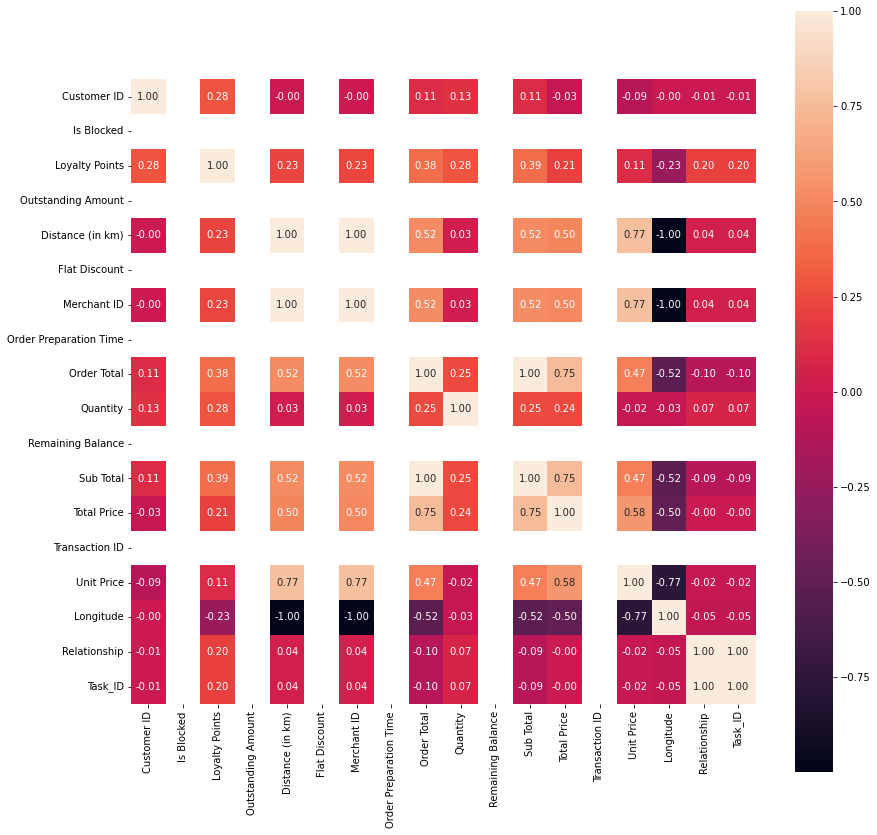

In [68]:
cor = data1.corr()
plt.figure(figsize=(14,14))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

In [ ]:

The range of the correlation is from -1 and +1. The values which are around zero 
like customer id  and total price has no linear trend between them hence 
has no correlation therefore contribute less to output variable. On the other hand, 
when the correlation is closer to 1, their correlation is strong hence contribute strongly to the output variable

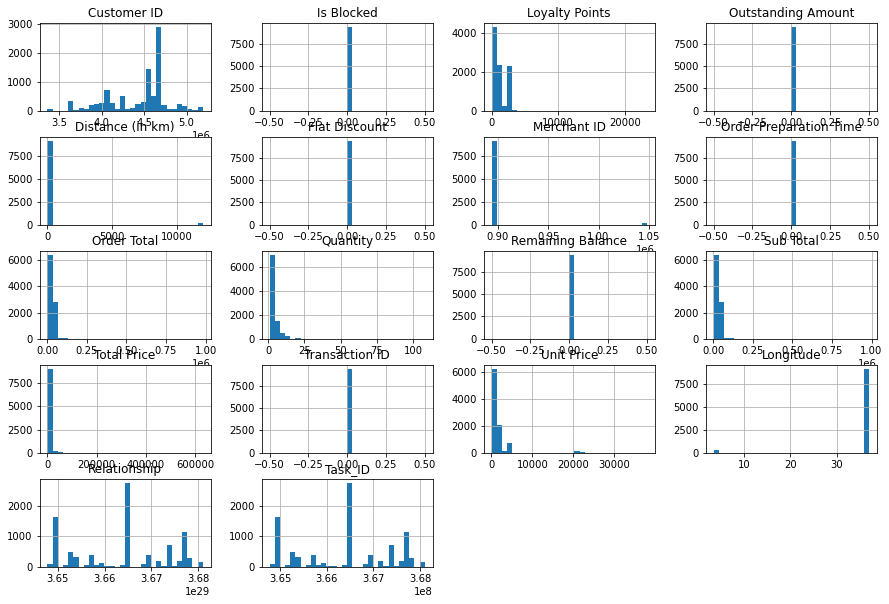

In [69]:
# Multiple histograms
data1.hist(bins=30, figsize=(15,10));

<AxesSubplot:>

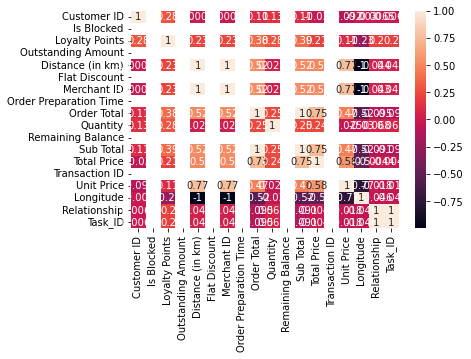

In [70]:
# Heatmap to view correlations
sns.heatmap(data1.corr(), annot=True)

# Predicting Customer retention

In [127]:
data2 = data1.rename(columns = {'Loyalty Points': 'Loyalty_points'}, inplace = False)

In [128]:
data2.Loyalty_points

0       68
1       55
2       55
3       55
4       55
        ..
9307     0
9308     0
9309     0
9310     0
9311     0
Name: Loyalty_points, Length: 9312, dtype: int64

In [129]:
# data2.Loyalty_points





In [130]:
data3 = data2.rename(columns = {'Order Status': 'Order_Status'}, inplace = False)

# Classify customers using Ordered status

In [131]:
data3.Order_Status=data3.Order_Status.map(dict(CANCELLED=0,COMPLETED=1, DISPATCHED=1, ORDERED=1))
data3.Order_Status.value_counts()

1    8973
0     339
Name: Order_Status, dtype: int64

In [132]:
Reliable_Customers=data3.Order_Status.value_counts()[1]
Reliable_Customers
Unreliable_Customers=data3.Order_Status.value_counts()[0]
Unreliable_Customers

339

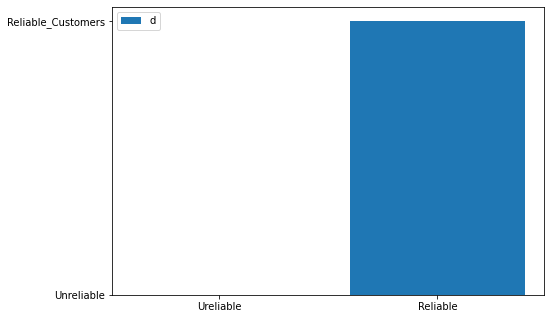

In [133]:
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
la = ['Ureliable','Reliable']
st = ['Unreliable','Reliable_Customers']
ax.bar(la,st)
plt.legend('dft')
plt.show()

# Prediction

In [134]:
data3.head(4)


,Created At,Customer ID,Is Blocked,Language,Last Used Platform,Loyalty_points,Outstanding Amount,Additional Charge,Category Name,Checkout Template Name,Checkout Template Value,Consumed Loyalty Points,Cost Price,Currency Symbol,Delivery Charge,Delivery Time,Description,Discount_x,Distance (in km),Flat Discount,Merchant ID,Order ID,Order Preparation Time,Order_Status,Order Time,Order Total,Payment Method,Pickup Address,Pickup Time,Quantity,Redeemed Loyalty Points,Remaining Balance,SKU,Store Name,Sub Total,Tax,Taxable Amount,Tip_x,Total Cost Price,Total Price,Transaction ID,Unit Price,Agent_ID,Complete_Before,Completion_Time,Custom_Template_ID,Delivery_Charges,Discount_y,Distance(m),Earning,Latitude,Longitude,Notes,Payment_Type,Pick_up_From,Pricing,Promo_Applied,Rating,Ref_Images,Relationship,Review,Special_Instructions,Start_Before,Subtotal,Task_Category,Task_Details_AMOUNT,Task_Details_QTY,Task_ID,Task_Status,Task_Type,Team_Name,Tip_y,Total_Time_Taken(min)
0,2021-04-21T07:15:56.000Z,3365019,0,en,WEB,68,0,-,Cooking Fat & Oil,-,-,43,4270,KSh,-,2022-02-11T08:00:00.000Z,NaN,-,20.09,0,893555,11138864,0,1,2022-02-10T22:20:24.000Z,4280.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-10T22:21:11.000Z,1,40,0,KKCO0620,Topup Mama,4320,-,-,-,4270,4320,0,4320,1092535,11 Feb 2022 10:00:00 am,11 Feb 2022 08:12:25 am,Order_Details,KSh 0.00,KSh 40.00,1557,0,-1.1496162,36.947408,NaN,CASH,Topup Mama,0,-,0,-,3.653445e+29,-,-,10 Feb 2022 10:21:11 pm,4280,-,KSh 4320.00,1,365344477,Completed,Delivery,Default Team,KSh 0.00,9.87
1,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,Cooking Fat & Oil,-,-,54,4250,KSh,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,893555,11253217,0,1,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,1,70,0,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,-,-,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,-,Topup Mama,0,-,0,-,3.677591e+29,-,-,16 Feb 2022 08:47:52 pm,-,-,KSh 4400.00,1,367759097,Completed,Delivery,Default Team,-,6.55
2,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,Cooking Fat & Oil,-,-,54,4250,KSh,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,893555,11253217,0,1,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,1,70,0,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,-,-,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,-,Topup Mama,0,-,0,-,3.677591e+29,-,-,16 Feb 2022 08:47:52 pm,-,-,KSh 1020.00,3,367759097,Completed,Delivery,Default Team,-,6.55
3,2021-04-21T10:23:50.000Z,3365770,0,en,WEB,55,0,-,Cooking Fat & Oil,-,-,54,4250,KSh,-,2022-02-17T08:00:00.000Z,Deliver tomorrow morning by 6.00a.m,-,4.49,0,893555,11253217,0,1,2022-02-16T20:50:20.000Z,5415.0,CASH,"Kilimani, Nairobi, Kenya",2022-02-16T20:47:52.000Z,1,70,0,KKCO0487,Topup Mama,5485,-,-,-,4250,4400,0,4400,1114991,17 Feb 2022 08:00:00 am,17 Feb 2022 06:10:30 am,Order_Details,KSh 0.00,KSh 70.00,-,0,-1.287314,36.805498,Deliver tomorrow morning by 6.00a.m,CASH,Topup Mama,0,-,0,-,3.677591e+29,-,Deliver tomorrow morning by 6.00a.m,16 Feb 2022 08:47:52 pm,5415,-,KSh 65.00,1,367759097,Completed,Delivery,Default Team,KSh 0.00,6.55


In [135]:
from sklearn.preprocessing import LabelBinarizer

In [136]:
data3.columns

Index(['Created At', 'Customer ID', 'Is Blocked', 'Language',
       'Last Used Platform', 'Loyalty_points', 'Outstanding Amount',
       'Additional Charge', 'Category Name', 'Checkout Template Name',
       'Checkout Template Value', 'Consumed Loyalty Points', 'Cost Price',
       'Currency Symbol', 'Delivery Charge', 'Delivery Time', 'Description',
       'Discount_x', 'Distance (in km)', 'Flat Discount', 'Merchant ID',
       'Order ID', 'Order Preparation Time', 'Order_Status', 'Order Time',
       'Order Total', 'Payment Method', 'Pickup Address', 'Pickup Time',
       'Quantity', 'Redeemed Loyalty Points', 'Remaining Balance', 'SKU',
       'Store Name', 'Sub Total', 'Tax', 'Taxable Amount', 'Tip_x',
       'Total Cost Price', 'Total Price', 'Transaction ID', 'Unit Price',
       'Agent_ID', 'Complete_Before', 'Completion_Time', 'Custom_Template_ID',
       'Delivery_Charges', 'Discount_y', 'Distance(m)', 'Earning', 'Latitude',
       'Longitude', 'Notes', 'Payment_Type', 'Pick_

In [137]:
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings

In [138]:
x= data3.drop(columns=['Order_Status','Created At', 'Language',
       'Last Used Platform', 'Outstanding Amount',
       'Additional Charge', 'Checkout Template Name',
         'Cost Price',
       'Currency Symbol', 'Delivery Charge', 'Delivery Time', 'Description',
       'Discount_x', 'Flat Discount',
        'Order Preparation Time', 'Order Time',
        'Payment Method', 'Pickup Address', 'Pickup Time',
        'Remaining Balance', 'SKU','Category Name',
       'Store Name',  'Tax', 'Taxable Amount', 'Tip_x','Distance(m)',
       'Checkout Template Value','Consumed Loyalty Points',
        'Complete_Before', 'Completion_Time', 'Custom_Template_ID',
       'Delivery_Charges', 'Discount_y', 'Notes', 'Payment_Type', 'Pick_up_From', 'Pricing',
       'Promo_Applied', 'Rating', 'Ref_Images', 'Relationship', 'Review','Agent_ID',
       'Special_Instructions', 'Start_Before',  'Task_Category','Earning','Latitude','Subtotal',
       'Task_Details_AMOUNT', 'Task_Details_QTY',  'Task_Status','Order ID','Redeemed Loyalty Points','Total Cost Price',
       'Task_Type', 'Team_Name', 'Tip_y', 'Total_Time_Taken(min)'],axis = 1)
y = data3.Order_Status

# rescale the metrics to the same mean and standard deviation


# Further divide the train data into train test split 70% & 30% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

In [139]:
x.dtypes

Customer ID           int64
Is Blocked            int64
Loyalty_points        int64
Distance (in km)    float64
Merchant ID           int64
Order Total         float64
Quantity              int64
Sub Total             int64
Total Price           int64
Transaction ID        int64
Unit Price            int64
Longitude           float64
Task_ID               int64
dtype: object

In [140]:
x.isnull().sum()

Customer ID         0
Is Blocked          0
Loyalty_points      0
Distance (in km)    0
Merchant ID         0
Order Total         0
Quantity            0
Sub Total           0
Total Price         0
Transaction ID      0
Unit Price          0
Longitude           0
Task_ID             0
dtype: int64

In [141]:
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
'XGBClassifier': XGBClassifier()
}

In [142]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': metrics.recall_score(y_test, y_pred,average='macro'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='macro'),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

[22:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.481747,0.500000,0.490704,0.963493
1,GaussianNB,0.569271,0.544078,0.552986,0.948461
2,RandomForest,0.999073,0.975490,0.986973,0.998210
3,DecisionTreeClassifier,0.999443,0.985294,0.992259,0.998926
4,SVM,0.481747,0.500000,0.490704,0.963493
5,KNeighborsClassifier,0.925782,0.957813,0.941164,0.991410
6,GradientBoosting,0.993255,0.960599,0.976323,0.996779
7,XGBClassifier,0.994443,0.985108,0.989728,0.998568
